<a href="https://colab.research.google.com/github/Seblao/Machine-Learning/blob/main/3.3%20ML%20Clustering%20-%20DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Challenge
Within this challenge, you're going to use DBSCAN on the famous Iris dataset to cluster the petal length and petal width. Typically, clustering is done using all columns but for visualization purposes, we're only going to use two in this exercise.

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import datasets

As said in the introduction, we're only going to use `petal_length` and `petal_width` to cluster observations to see similar/different `species` are.

In [ ]:
# Load the dataset.
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# For the 'species' column, replace [setosa, versicolor, virginica] with [0, 1, 2], respectively.
# To be explicit, this means that all observations with a species of "setosa" should now have a species of 0
# Rplace les vleurs de la colonne 'species' :
df['species'] = df['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})

df

<ipython-input-8-e3c93f5b44d1>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Split the dataset into just X and Y (Diviser l'ensble de données en X et Y uniquemt. Étant donné q'on effectue 1 clustering, il n'est pas nécessaire de le diviser en segmts d'entraînemt/validat°/test, mais uniquemt en X et Y)
# Note: Since we're clustering, there's no need to split into train/validation/test splits but rather just X and Y
# X : Caractéristiq (sépare les étiquettes) :
X = df.drop(columns=['species'])

# Y : Étiquettes (sp) :
Y = df['species']

# Affichage des résultats :
print("Caractéristiq (X):")
print(X.head())

print("\nÉtiquettes (Y):")
print(Y.head())

Caractéristiq (X):
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Étiquettes (Y):
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


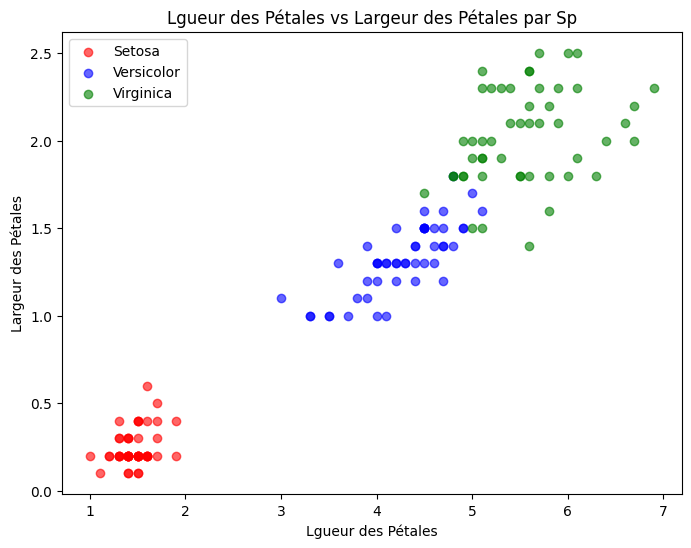

In [ ]:
# Using matplotlib, plot the original datapoints such that each species is a different color (Tracer les pts de données afin q chaq sp soit d'1 cleur différente. (petal_length sur l'axe des x et petal_width sur l'axe des y. Ttes les observat° avec sp == 0, cleur rge ; sp == 1, cleur bleu...)
# Make petal_length the x-axis and petal_width the y-axis
# For example, all observations with (species == 0) should be red, all observations with species == 1 should be blue, etc.
# Créer 1 figure :
plt.figure(figsize=(8, 6))

# Trace les pts en fct° de l'sp :
plt.scatter(df[df['species'] == 0]['petal_length'],
            df[df['species'] == 0]['petal_width'],
            color='red', label='Setosa', alpha=0.6)

plt.scatter(df[df['species'] == 1]['petal_length'],
            df[df['species'] == 1]['petal_width'],
            color='blue', label='Versicolor', alpha=0.6)

plt.scatter(df[df['species'] == 2]['petal_length'],
            df[df['species'] == 2]['petal_width'],
            color='green', label='Virginica', alpha=0.6)

# Ajte des labels :
plt.title("Lgueur des Pétales vs Largeur des Pétales par Sp")
plt.xlabel("Lgueur des Pétales")
plt.ylabel("Largeur des Pétales")

plt.legend()
plt.show()

In [ ]:
# Using the default parameters of DBSCAN in Scikit-Learn, cluster the observations and print out each observations predictions (En utilisant les pramètres par déft de DBSCAN ds Scikit-Learn, regrpe les observat° et imprime les prédict° de chaq observat°)
# Par exemple, la sortie devrait ressembler à [0, 0, 1, 1, 2, 2, ...]
# For example, the output should be something like [0, 0, 1, 1, 2, 2, ...]
# Pour DBSCAN, on utilise les colonnes de caractéristiq (pas la colonne 'species') :

# Sélectionne les caractéristiq : petal_length et petal_width
X = df[['petal_length', 'petal_width']]

# Nrmalise des données :
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliq DBSCAN avec les pramètres par déft :
db = DBSCAN()
db.fit(X_scaled)

# Affiche les prédict° de chaq observat° :
predictions = db.labels_

predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

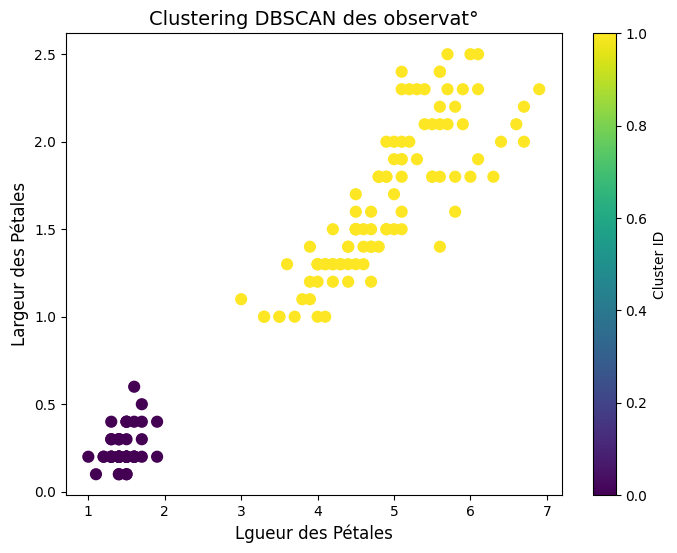

In [ ]:
# Using these predictions, again plot the predicted clusters with matplotlib (En utilisant les prédict°, trace à nvx les clusters prédits)
# Créer 1 figure :
plt.figure(figsize=(8, 6))

# Trace les pts, coloris par les labels de clusters :
plt.scatter(X['petal_length'], X['petal_width'], c=predictions, cmap='viridis', marker='o', s=60)

plt.title("Clustering DBSCAN des observat°", fontsize=14)
plt.xlabel("Lgueur des Pétales", fontsize=12)
plt.ylabel("Largeur des Pétales", fontsize=12)

# Ajt d'1 barre de cleur pr indiq les différents clusters :
plt.colorbar(label="Cluster ID")
plt.show()

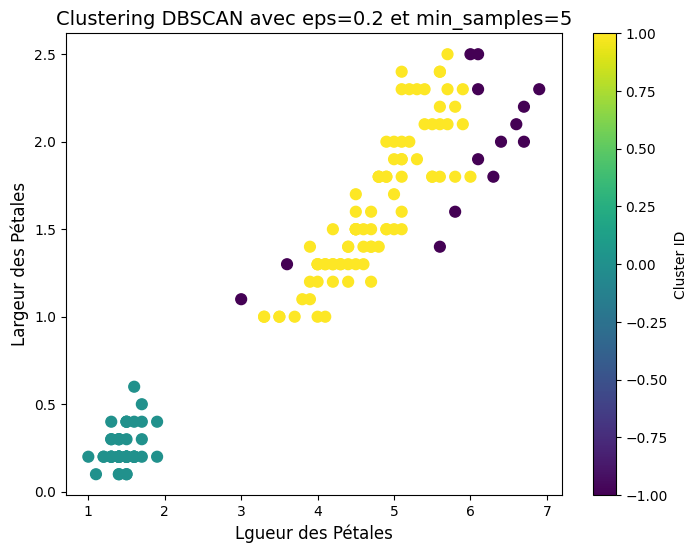

In [ ]:
# Now choose epsilon to be 0.2 and minsamples to be 5 and repeat the process of predicting (Choisis epsilon à 0,2 et min samples à 5, puis refait le processus de prédict°)
# If you cannot recall what these hyperparameters represent, refer back to the Quest so that you have an understanding of what is changing
# Appliq DBSCAN avec eps=0.2 et min_samples=5 :
db = DBSCAN(eps=0.2, min_samples=5)
db.fit(X_scaled)

# Obtiens les prédict° (labels de clusters) :
predictions = db.labels_

# Créer 1 figure :
plt.figure(figsize=(8, 6))

# Trace les pts, coloris les labels de clusters :
plt.scatter(X['petal_length'], X['petal_width'], c=predictions, cmap='viridis', marker='o', s=60)

plt.title("Clustering DBSCAN avec eps=0.2 et min_samples=5", fontsize=14)
plt.xlabel("Lgueur des Pétales", fontsize=12)
plt.ylabel("Largeur des Pétales", fontsize=12)

# Ajt d'1 barre de cleur pr indiq les différents clusters :
plt.colorbar(label="Cluster ID")
plt.show()

In [ ]:
# Question: Within these predictions, what do you think -1 represents? Remember that the only labels that we assigned we're 0, 1, and 2 (Parmi ces prédict°, q rprste, -1 ? Les seules étiquettes attribuées st 0, 1 et 2)
# To give you a hint, what are the two things that DBSCAN is concerned with (which is also listed in the Quest)? (Quels st les 2 élémts sur lesquels DBSCAN s'intéresse (et qui st égalemt listés ds la quête)


Le -1 ds les prédict° de DBSCAN rprste des pts csidérés c du bruit.

Qd on utilise DBSCAN, l'algorithme cherche des grpes denses de pts (clusters). Les 2 élémts principx pour DBSCAN st :

La distce (epsilon, eps) : distce max à laquelle 2 pts pvt-ê csidérés c voisins. Si distce entre 2 pts est < à eps, ils st csidérés c voisins.

Le nn mini de voisins (min_samples, min_samples) : Le nb mini de pts requis pr qu'1 voisinage soit csidéré c 1 cluster. Si 1 pt a moins de min_samples voisins (y cpris lui-même), il est csidéré c du bruit.

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


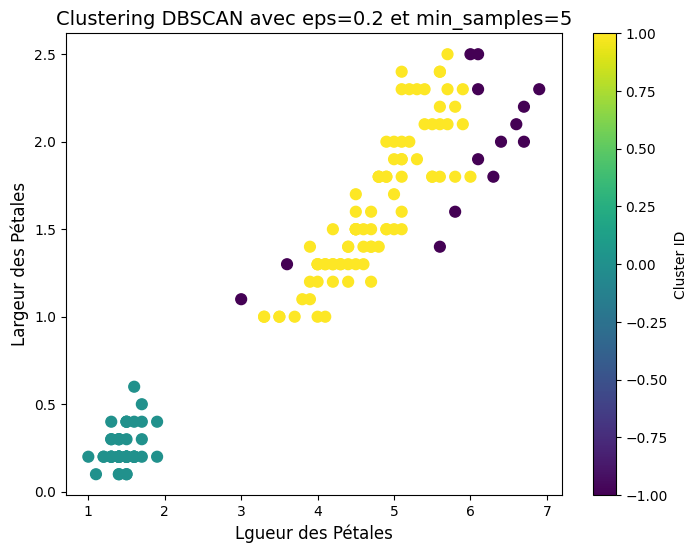

In [ ]:
# Now using the predictions with epsilon = 0.2 and minsamples = 5 (Nous utilisons maintenant les prédictions avec epsilon = 0,2 et minsamples = 5)
# Appliq DBSCAN avec eps=0.2 et min_samples=5 :
db = DBSCAN(eps=0.2, min_samples=5)
db.fit(X_scaled)

# Obtient des prédict° (labels de clusters) :
predictions = db.labels_

# Affiche les prédict° pr chaq observat° :
print(predictions)

# Créer 1 figure :
plt.figure(figsize=(8, 6))

# Tracer les pts, coloris par les labels de clusters :
plt.scatter(X['petal_length'], X['petal_width'], c=predictions, cmap='viridis', marker='o', s=60)

plt.title("Clustering DBSCAN avec eps=0.2 et min_samples=5", fontsize=14)
plt.xlabel("Lgueur des Pétales", fontsize=12)
plt.ylabel("Largeur des Pétales", fontsize=12)

# Ajt d'1 barre de cleur pr indiq les différents clusters :
plt.colorbar(label="Cluster ID")
plt.show()

Now, hopefully you have a solid understanding of what DBSCAN is, how to implement this using Scikit-Learn, and how big of a difference using different hyper-parameters can cause to your clustering algorithm.

In an ideal world, there would be one set of hyperparameters that _always_ performs best for every dataset but unfortunately this isn't the case...

As said multiple times, it should be again be noted that clustering algorithms are typically done using _*ALL*_ columns in the dataset but within this exercise, we only used 2 for easy visualization purposes.


J'espère q vous avez maintenant 1 bonne cpréhens° de DBSCAN, de son implémentat° avec Scikit-Learn et de l'impact de l'utilisat° de différents hyperparamètres sur votre algorithme de clustering.

Ds 1 monde idéal, il existerait 1 ensble d'hyperparamètres tjrs + performant pr chaq jeu de données, mais ce n'est malheureusemt pas le cas…

C indiqué à plsrs reprises, il convient de noter q les algorithmes de clustering utilisent généralemt ttes les colonnes du jeu de données. Cpdt, ds cet exercice, ns n'en avons utilisé q 2 pr faciliter la visualisat°.
